# Задание:


1. Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
   - устранение пропусков в данных;
   - кодирование категориальных признаков;
   - нормализация числовых признаков.

# Текстовое описание датасета

В качестве датасета будем использовать набор данных, содержащий данные с информацией об автомобиле.Данный набор доступен по адресу:https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset

Набор данных имеет следующие атрибуты:

- Name: Уникальный идентификатор для каждого автомобиля.
- MPG: Эффективность использования топлива измеряется в милях на галлон.
- Cylinders: количество цилиндров в двигателе.
- Displacement: объем двигателя с указанием его размера или мощности.
- Horsepower: Выходная мощность двигателя.
- Weight: Вес автомобиля.
- Acceleration: Возможность увеличения скорости, измеряемая в секундах.
- Model Year: год выпуска модели автомобиля.
- Origin: Страна или регион происхождения каждого автомобиля.




### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

### Загрузка данных

In [3]:
data = pd.read_csv('Automobile.csv')

### Первичный анализ данных

Выведем первые 5 строк датасета:

In [4]:
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


Определим размер датасета:

In [5]:
data.shape

(398, 9)

In [6]:
data.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

Проверим наличие пропусков:

In [7]:
data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

## Устранение пропусков в данных 

Удалим колонки, содержащие пустые значения:

In [8]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((398, 9), (398, 8))

Выведем первые строки датасета на экран:

In [9]:
data_new_1

,name,mpg,cylinders,displacement,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,2625,18.6,82,usa


Удалим строки, содержащие пустые значения:

In [10]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((398, 9), (392, 9))

In [11]:
data_new_2.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


Заполним все пропущенные значения нулями:

In [13]:
data_new_3 = data.fillna(0)

Выведем на экран:

In [14]:
data_new_3.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


### Обработка пропусков в числовых данных

Выберем числовые столбцы с пропущенными значениями и посчитаем количество пустых значений:

In [15]:
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Столбец {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Столбец horsepower. Тип данных float64. Количество пустых значений 6, 1.51%.


Отфильтруем по столбцам:

In [16]:
data_num = data[num_cols]
data_num

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


Гистограмма по признакам:

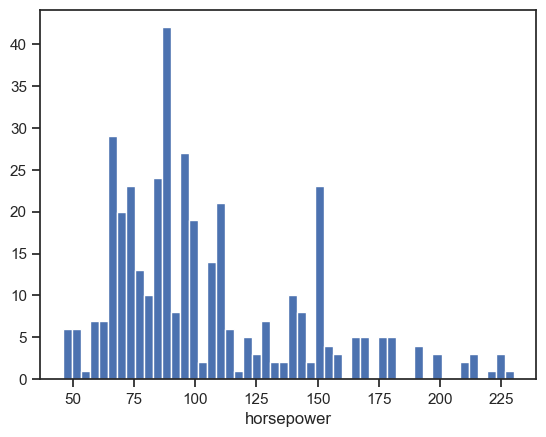

In [17]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [19]:
data_num_pit = data_num[['horsepower']]

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

Фильтр для проверки заполнения пустых значений:

In [21]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_pit)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

Проведем импьютацию различными показателями центра распределения:

In [22]:
strategies=['mean', 'median', 'most_frequent']

In [23]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_pit)
    return data_num_imp[mask_missing_values_only]

In [24]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([104.46938776, 104.46938776, 104.46938776, 104.46938776,
        104.46938776, 104.46938776]))

In [25]:
strategies[1], test_num_impute(strategies[1])

('median', array([93.5, 93.5, 93.5, 93.5, 93.5, 93.5]))

In [26]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([150., 150., 150., 150., 150., 150.]))

Создадим функцию, позволяющую задавать столбец и вид импьютации:

In [27]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

Проверим работу функции по весу автомобиля:

In [39]:
data[['horsepower']].describe()

,horsepower
count,392.000000
mean,104.469388
std,38.491160
min,46.000000
25%,75.000000
50%,93.500000
75%,126.000000
max,230.000000


In [40]:
test_num_impute_col(data, 'horsepower', strategies[0])

('horsepower', 'mean', 6, 104.46938775510205, 104.46938775510205)

In [41]:
test_num_impute_col(data, 'horsepower', strategies[1])

('horsepower', 'median', 6, 93.5, 93.5)

In [42]:
test_num_impute_col(data, 'horsepower', strategies[2])

('horsepower', 'most_frequent', 6, 150.0, 150.0)

### Обработка пропусков в категориальных данных

Так как в датасете нет пропусков среди столбца "Марка автомобиля", то искуственно подправим датасет и загрузим его:

In [45]:
data_mod = pd.read_csv('Automobile_1.csv')

Проверим категориальный признак:

In [46]:
cat_cols = []
for col in data.columns:
    temp_null_count = data_mod[data_mod[col].isnull()].shape[0]
    dt = str(data_mod[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Столбец {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

In [47]:
cat_temp_data = data_mod[['name']]
cat_temp_data.head()

,name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [48]:
cat_temp_data['name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [49]:
cat_temp_data[cat_temp_data['name'].isnull()].shape

(0, 1)

In [50]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['chevrolet chevelle malibu'],
       ['buick skylark 320'],
       ['plymouth satellite'],
       ['amc rebel sst'],
       ['ford torino'],
       ['ford galaxie 500'],
       ['chevrolet impala'],
       ['plymouth fury iii'],
       ['pontiac catalina'],
       ['amc ambassador dpl'],
       ['dodge challenger se'],
       ["plymouth 'cuda 340"],
       ['chevrolet monte carlo'],
       ['buick estate wagon (sw)'],
       ['toyota corona mark ii'],
       ['plymouth duster'],
       ['amc hornet'],
       ['ford maverick'],
       ['datsun pl510'],
       ['volkswagen 1131 deluxe sedan'],
       ['peugeot 504'],
       ['audi 100 ls'],
       ['saab 99e'],
       ['bmw 2002'],
       ['amc gremlin'],
       ['ford f250'],
       ['chevy c20'],
       ['dodge d200'],
       ['hi 1200d'],
       ['datsun pl510'],
       ['chevrolet vega 2300'],
       ['toyota corona'],
       ['ford pinto'],
       ['amc gremlin'],
       ['plymouth satellite custom'],
       ['chevrolet chev

In [51]:
np.unique(data_imp2)

array(['amc ambassador brougham', 'amc ambassador dpl',
       'amc ambassador sst', 'amc concord', 'amc concord d/l',
       'amc concord dl', 'amc concord dl 6', 'amc gremlin', 'amc hornet',
       'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)',
       'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl',
       'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000',
       'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i',
       'buick century', 'buick century 350', 'buick century limited',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick estate wagon (sw)',
       'buick lesabre custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'buick skylark 320', 'buick skylark limited',
       'cadillac eldorado', 'cadillac seville', 'capri ii',
       'chevroelt chevelle malibu', 'chevrolet bel air',
       'chevrolet camaro', 'chevrolet ca

Импьютация константой:

In [53]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='???')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['chevrolet chevelle malibu'],
       ['buick skylark 320'],
       ['plymouth satellite'],
       ['amc rebel sst'],
       ['ford torino'],
       ['ford galaxie 500'],
       ['chevrolet impala'],
       ['plymouth fury iii'],
       ['pontiac catalina'],
       ['amc ambassador dpl'],
       ['dodge challenger se'],
       ["plymouth 'cuda 340"],
       ['chevrolet monte carlo'],
       ['buick estate wagon (sw)'],
       ['toyota corona mark ii'],
       ['plymouth duster'],
       ['amc hornet'],
       ['ford maverick'],
       ['datsun pl510'],
       ['volkswagen 1131 deluxe sedan'],
       ['peugeot 504'],
       ['audi 100 ls'],
       ['saab 99e'],
       ['bmw 2002'],
       ['amc gremlin'],
       ['ford f250'],
       ['chevy c20'],
       ['dodge d200'],
       ['hi 1200d'],
       ['datsun pl510'],
       ['chevrolet vega 2300'],
       ['toyota corona'],
       ['ford pinto'],
       ['amc gremlin'],
       ['plymouth satellite custom'],
       ['chevrolet chev

In [54]:
np.unique(data_imp3)

array(['amc ambassador brougham', 'amc ambassador dpl',
       'amc ambassador sst', 'amc concord', 'amc concord d/l',
       'amc concord dl', 'amc concord dl 6', 'amc gremlin', 'amc hornet',
       'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)',
       'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl',
       'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000',
       'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i',
       'buick century', 'buick century 350', 'buick century limited',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick estate wagon (sw)',
       'buick lesabre custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'buick skylark 320', 'buick skylark limited',
       'cadillac eldorado', 'cadillac seville', 'capri ii',
       'chevroelt chevelle malibu', 'chevrolet bel air',
       'chevrolet camaro', 'chevrolet ca

In [55]:
data_imp3[data_imp3==0].size

0

In [56]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


## Кодирование категориальных признаков

In [43]:
from sklearn.preprocessing import LabelEncoder

In [57]:
cat_enc['c1'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [58]:
le = LabelEncoder()

In [59]:
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [60]:
le.classes_

array(['amc ambassador brougham', 'amc ambassador dpl',
       'amc ambassador sst', 'amc concord', 'amc concord d/l',
       'amc concord dl', 'amc concord dl 6', 'amc gremlin', 'amc hornet',
       'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)',
       'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl',
       'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000',
       'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i',
       'buick century', 'buick century 350', 'buick century limited',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick estate wagon (sw)',
       'buick lesabre custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'buick skylark 320', 'buick skylark limited',
       'cadillac eldorado', 'cadillac seville', 'capri ii',
       'chevroelt chevelle malibu', 'chevrolet bel air',
       'chevrolet camaro', 'chevrolet ca

In [61]:
cat_enc_le

array([ 49,  36, 231,  14, 161, 141,  54, 223, 241,   1, 101, 215,  57,
        30, 274, 220,   8, 150,  95, 282, 211,  16, 258,  22,   7, 133,
        68, 112, 163,  95,  65, 271, 156,   7, 232,  49, 162,  10,  54,
       242, 141, 223, 116, 129, 250,   9,  64, 243, 151, 187, 208, 210,
       123, 267,  76, 286, 218, 272, 105, 293,  63, 158,  54, 241, 223,
       141,   2, 192,  31, 203,  75, 183,  11,  48, 143, 233, 295, 283,
       212, 253, 157,  85, 279, 104, 268,  25,  10,  55, 142, 109, 193,
        44, 148, 222,  74,  29,   0, 235,  62,   8, 150, 220, 292,  54,
       128, 219, 207,   7, 263,  63,  87, 174, 156, 188, 121,  59, 244,
       124, 209,  17, 294, 113, 260, 276, 204, 220, 150,   8,  61,  92,
       156, 267,  63,  50,  10, 234, 142,  27, 110, 143,  11,  21, 284,
       209, 271,  88, 103, 124, 122, 167, 261, 127, 236,  61, 194, 150,
       241,  42, 224, 148,  24,  41,  10, 221,  34,  60, 154, 266, 156,
         7, 240, 271, 284,  88, 156, 287,  12,  17, 211, 296, 26

In [62]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [63]:
le.inverse_transform([ 0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
       260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
       286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304])

array(['amc ambassador brougham', 'amc ambassador dpl',
       'amc ambassador sst', 'amc concord', 'amc concord d/l',
       'amc concord dl', 'amc concord dl 6', 'amc gremlin', 'amc hornet',
       'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)',
       'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl',
       'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000',
       'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i',
       'buick century', 'buick century 350', 'buick century limited',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick estate wagon (sw)',
       'buick lesabre custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'buick skylark 320', 'buick skylark limited',
       'cadillac eldorado', 'cadillac seville', 'capri ii',
       'chevroelt chevelle malibu', 'chevrolet bel air',
       'chevrolet camaro', 'chevrolet ca

In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [65]:
data_oe = data_mod[['name', 'cylinders']]
data_oe.head()

,name,cylinders
0,chevrolet chevelle malibu,8
1,buick skylark 320,8
2,plymouth satellite,8
3,amc rebel sst,8
4,ford torino,8


In [66]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='???')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['chevrolet chevelle malibu', 8],
       ['buick skylark 320', 8],
       ['plymouth satellite', 8],
       ['amc rebel sst', 8],
       ['ford torino', 8],
       ['ford galaxie 500', 8],
       ['chevrolet impala', 8],
       ['plymouth fury iii', 8],
       ['pontiac catalina', 8],
       ['amc ambassador dpl', 8],
       ['dodge challenger se', 8],
       ["plymouth 'cuda 340", 8],
       ['chevrolet monte carlo', 8],
       ['buick estate wagon (sw)', 8],
       ['toyota corona mark ii', 4],
       ['plymouth duster', 6],
       ['amc hornet', 6],
       ['ford maverick', 6],
       ['datsun pl510', 4],
       ['volkswagen 1131 deluxe sedan', 4],
       ['peugeot 504', 4],
       ['audi 100 ls', 4],
       ['saab 99e', 4],
       ['bmw 2002', 4],
       ['amc gremlin', 6],
       ['ford f250', 8],
       ['chevy c20', 8],
       ['dodge d200', 8],
       ['hi 1200d', 8],
       ['datsun pl510', 4],
       ['chevrolet vega 2300', 4],
       ['toyota corona', 4],
       ['for

In [67]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[ 49.,   4.],
       [ 36.,   4.],
       [231.,   4.],
       [ 14.,   4.],
       [161.,   4.],
       [141.,   4.],
       [ 54.,   4.],
       [223.,   4.],
       [241.,   4.],
       [  1.,   4.],
       [101.,   4.],
       [215.,   4.],
       [ 57.,   4.],
       [ 30.,   4.],
       [274.,   1.],
       [220.,   3.],
       [  8.,   3.],
       [150.,   3.],
       [ 95.,   1.],
       [282.,   1.],
       [211.,   1.],
       [ 16.,   1.],
       [258.,   1.],
       [ 22.,   1.],
       [  7.,   3.],
       [133.,   4.],
       [ 68.,   4.],
       [112.,   4.],
       [163.,   4.],
       [ 95.,   1.],
       [ 65.,   1.],
       [271.,   1.],
       [156.,   1.],
       [  7.,   3.],
       [232.,   3.],
       [ 49.,   3.],
       [162.,   3.],
       [ 10.,   3.],
       [ 54.,   4.],
       [242.,   4.],
       [141.,   4.],
       [223.,   4.],
       [116.,   4.],
       [129.,   4.],
       [250.,   4.],
       [  9.,   3.],
       [ 64.,   1.],
       [243.,

In [68]:
np.unique(cat_enc_oe[:, 0])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [69]:
np.unique(cat_enc_oe[:, 1])

array([0., 1., 2., 3., 4.])

In [70]:
oe.categories_

[array(['amc ambassador brougham', 'amc ambassador dpl',
        'amc ambassador sst', 'amc concord', 'amc concord d/l',
        'amc concord dl', 'amc concord dl 6', 'amc gremlin', 'amc hornet',
        'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)',
        'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl',
        'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000',
        'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i',
        'buick century', 'buick century 350', 'buick century limited',
        'buick century luxus (sw)', 'buick century special',
        'buick electra 225 custom', 'buick estate wagon (sw)',
        'buick lesabre custom', 'buick opel isuzu deluxe',
        'buick regal sport coupe (turbo)', 'buick skyhawk',
        'buick skylark', 'buick skylark 320', 'buick skylark limited',
        'cadillac eldorado', 'cadillac seville', 'capri ii',
        'chevroelt chevelle malibu', 'chevrolet bel air',
        'chevrolet camaro

In [71]:
oe.inverse_transform(cat_enc_oe)

array([['chevrolet chevelle malibu', 8],
       ['buick skylark 320', 8],
       ['plymouth satellite', 8],
       ['amc rebel sst', 8],
       ['ford torino', 8],
       ['ford galaxie 500', 8],
       ['chevrolet impala', 8],
       ['plymouth fury iii', 8],
       ['pontiac catalina', 8],
       ['amc ambassador dpl', 8],
       ['dodge challenger se', 8],
       ["plymouth 'cuda 340", 8],
       ['chevrolet monte carlo', 8],
       ['buick estate wagon (sw)', 8],
       ['toyota corona mark ii', 4],
       ['plymouth duster', 6],
       ['amc hornet', 6],
       ['ford maverick', 6],
       ['datsun pl510', 4],
       ['volkswagen 1131 deluxe sedan', 4],
       ['peugeot 504', 4],
       ['audi 100 ls', 4],
       ['saab 99e', 4],
       ['bmw 2002', 4],
       ['amc gremlin', 6],
       ['ford f250', 8],
       ['chevy c20', 8],
       ['dodge d200', 8],
       ['hi 1200d', 8],
       ['datsun pl510', 4],
       ['chevrolet vega 2300', 4],
       ['toyota corona', 4],
       ['for

## Нормализация числовых признаков

In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [73]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['horsepower']])

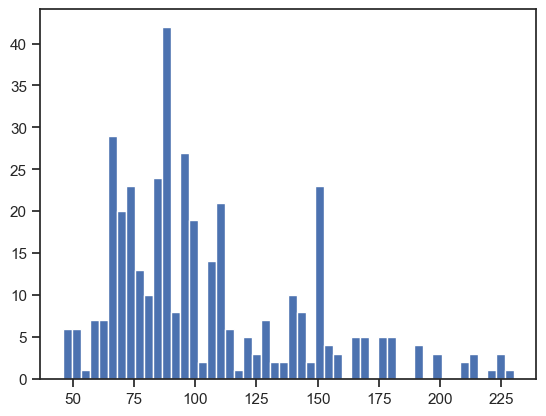

In [74]:
plt.hist(data['horsepower'], 50)
plt.show()

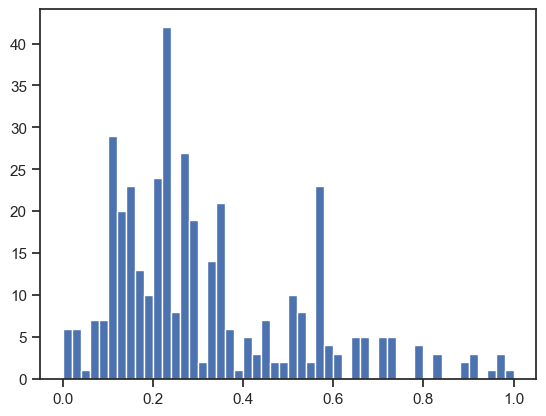

In [75]:
plt.hist(sc1_data, 50)
plt.show()

In [76]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['horsepower']])

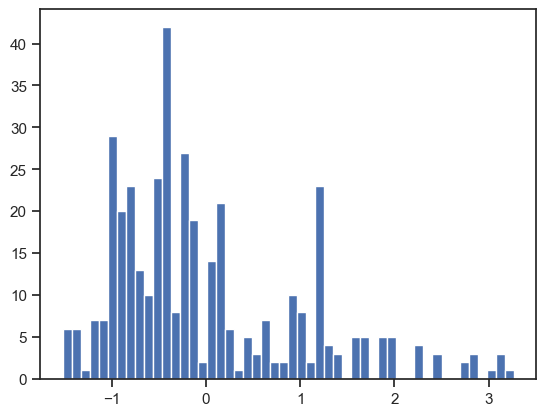

In [77]:
plt.hist(sc2_data, 50)
plt.show()